## Imports

In [1]:
# standard libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json

# plotting libs
import seaborn as sns

## Data

### Import Data

In [2]:
# import cities response df
cities21_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2021_Cities_Water_Security_Risks.csv")
cities20_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2020_Full_Cities_Dataset.csv")
cities19_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2019_Full_Cities_Dataset.csv")



### Data Cleaning & EDA



In [3]:
cities19_df[cities19_df['Parent Section']=='Water Security']['Question Name'].unique()

array(['Please select the actions you are taking to reduce the risks to your city’s water supply.',
       'Please identify the risks to your city’s water supply as well as the timescale and level of risk.',
       'Please provide more information on your city’s public Water Resource Management\u202fstrategy.',
       "What are the sources of your city's water supply? Select all that apply.",
       "What percentage of your city's population has access to potable water supply service?",
       'Does your city have a publicly available Water Resource Management\u202fstrategy?',
       'Where does the water used to supply your city come from?',
       'Please explain why your city does not have a public Water Resource Management strategy.',
       'Are you aware of any substantive current or future risks to your city’s water supply?',
       'Please explain why you do not consider your city to be exposed to any substantive water-related risk.'],
      dtype=object)

In [4]:
cities21_df=cities21_df\
    .rename(columns={'Account Name': 'City'})
#cities21_df['Water security risk drivers'] = cities21_df['Water security risk drivers'].fillna('No Response')
cities21_df.dropna(subset=['Water security risk drivers'],inplace=True)
cities20_df = cities20_df[cities20_df['Question Number'] == '14.2a']\
    .rename(columns={'Organization': 'City'})
cities20_df['Response Answer'] = cities20_df['Response Answer'].fillna('No Response')
cities19_df = cities19_df[
    cities19_df['Question Name'] == 
    'Please identify the risks to your city’s water supply as well as the timescale and level of risk.']\
    .rename(columns={'Organization': 'City'})
cities19_df['Response Answer'] = cities19_df['Response Answer'].fillna('No Response')

cities21_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 2348
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Questionnaire Name                       2137 non-null   object
 1   Account Number                           2137 non-null   int64 
 2   City                                     2137 non-null   object
 3   Country                                  2137 non-null   object
 4   CDP Region                               2137 non-null   object
 5   ParentSection                            2137 non-null   object
 6   Section                                  2137 non-null   object
 7   Question Number                          2137 non-null   object
 8   Question Name                            2137 non-null   object
 9   Row Number                               2137 non-null   int64 
 10  Water security risk drivers              2137 non-null   obj

In [5]:
sum(cities21_df.duplicated(['City','Water security risk drivers']))

92

In [6]:
df1=pd.crosstab(index=cities21_df['Water security risk drivers'], columns='count').sort_values(by='count',ascending=False)
df1.head(20)

col_0,count
Water security risk drivers,
Question not applicable,512
Increased water stress,250
Declining water quality,237
Inadequate or ageing water supply infrastructure,197
Increased water demand,160
Drought,148
Increased water scarcity,147
Severe weather events,101
Higher water prices,89


<AxesSubplot:ylabel='count'>

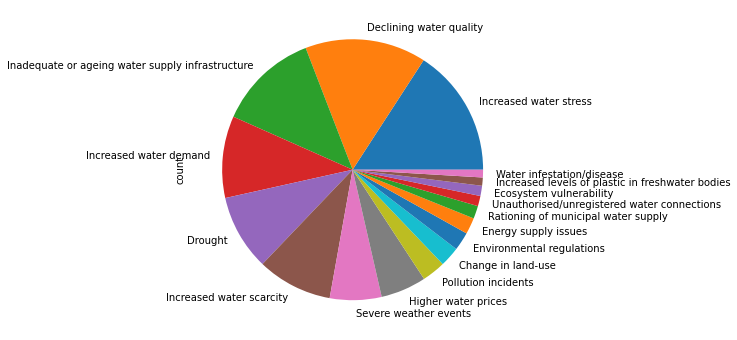

In [7]:
df1.iloc[1:18,:].plot.pie(y='count',figsize=(6,6),legend=False)

In [8]:
cities20_df.head()

,Questionnaire,Year Reported to CDP,Account Number,City,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
78,Cities 2020,2020,74594,City of Boynton Beach,United States of America,North America,Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,5,Risk description,4,NaN,The region experiences periods of drought. Ris...,NaN,NaN,09/07/2020 09:45:36 AM
175,Cities 2020,2020,826236,Prefeitura de Tremembé,Brazil,Latin America,Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Estimated probability of impact,2,NaN,No Response,NaN,NaN,09/07/2020 09:45:36 AM
236,Cities 2020,2020,54402,City of Lahti,Finland,Europe,Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Estimated probability of impact,3,NaN,No Response,NaN,NaN,09/07/2020 09:45:36 AM
284,Cities 2020,2020,839980,Municipalidad de Avellaneda,Argentina,Latin America,Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Water security risk drivers,0,NaN,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM
335,Cities 2020,2020,50361,Ayuntamiento de Hermosillo,Mexico,Latin America,Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Estimated probability of impact,1,NaN,High,NaN,NaN,09/07/2020 09:45:36 AM


In [9]:
risk20=cities20_df.pivot_table(index=['Account Number', 'City', 'Row Number'],
                                     columns='Column Name', 
                                     values='Response Answer',
                                     aggfunc=lambda x: ' '.join(x)).reset_index()
risk20.head()

Column Name,Account Number,City,Row Number,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description,Water security risk drivers
0,1184,City of Austin,1,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...,Increased water stress
1,1499,Ajuntament de Barcelona,1,Current,Serious,Medium-high,The downscaling of the climate projections at ...,Increased water stress
2,1499,Ajuntament de Barcelona,2,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...,Declining water quality
3,1499,Ajuntament de Barcelona,3,Current,Serious,Medium-high,"In terms of water supply, rivers floods could ...",Severe weather events
4,1499,Ajuntament de Barcelona,4,Current,Serious,Medium-high,Climate Plan vulnerability assessement showed ...,Increased water scarcity


In [10]:
df2=pd.crosstab(index=risk20['Water security risk drivers'], columns='count').sort_values(by='count',ascending=False)
df2.head(20)

col_0,count
Water security risk drivers,
No Response,227
Question not applicable,214
Increased water stress,209
Declining water quality,163
Inadequate or ageing water supply infrastructure,140
Increased water demand,96
Drought,88
Increased water scarcity,73
Severe weather events,65


<AxesSubplot:ylabel='count'>

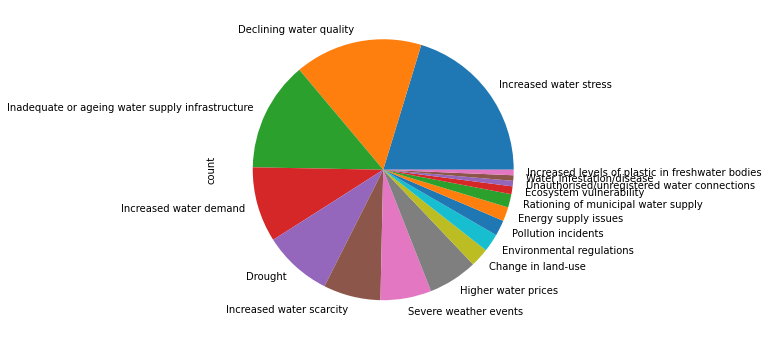

In [11]:
df2.iloc[2:19,:].plot.pie(y='count',figsize=(6,6),legend=False)

In [12]:
cities19_df.head()

,Questionnaire,Year Reported to CDP,Account Number,City,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
5,Cities 2019,2019,54588,West Coast District Municipality,South Africa,Africa,Water Security,Water Supply,14.3a,Please identify the risks to your city’s water...,2,Estimated timescale,1,NaN,Short-term,NaN,NaN,24/06/2020 05:30:36 AM
85,Cities 2019,2019,60104,Cambridge City Council,United Kingdom of Great Britain and Northern I...,Europe,Water Security,Water Supply,14.3a,Please identify the risks to your city’s water...,3,Estimated magnitude,1,NaN,Serious,NaN,NaN,24/06/2020 05:30:36 AM
90,Cities 2019,2019,839666,Municipio de Escuintla,Guatemala,Latin America,Water Security,Water Supply,14.3a,Please identify the risks to your city’s water...,2,Estimated timescale,1,NaN,Medium-term,NaN,NaN,24/06/2020 05:30:36 AM
219,Cities 2019,2019,840328,Municipalidad San Pedro Carchá,Guatemala,Latin America,Water Security,Water Supply,14.3a,Please identify the risks to your city’s water...,1,Risks,2,NaN,Higher water prices,NaN,NaN,24/06/2020 05:30:36 AM
314,Cities 2019,2019,35863,eThekwini Municipality,South Africa,Africa,Water Security,Water Supply,14.3a,Please identify the risks to your city’s water...,3,Estimated magnitude,2,NaN,Extremely serious,NaN,NaN,24/06/2020 05:30:36 AM


In [13]:
risk19=cities19_df.pivot_table(index=['Account Number', 'City', 'Row Number'],
                                     columns='Column Name', 
                                     values='Response Answer',
                                     aggfunc=lambda x: ' '.join(x)).reset_index()
risk19.head()

Column Name,Account Number,City,Row Number,Estimated magnitude,Estimated timescale,Risk description,Risks
0,1093,City of Atlanta,1,Serious,Short-term,The city depends on one river for water supply...,Increased water stress
1,1093,City of Atlanta,2,Serious,Current,The water cost burden is felt across all ZIP c...,Higher water prices
2,1184,City of Austin,1,Extremely serious,Short-term,Central Texas is drought prone and we depend o...,Increased water stress
3,1499,Ajuntament de Barcelona,1,Less Serious,Current,The downscaling of the climate projections at ...,Increased water stress
4,1499,Ajuntament de Barcelona,2,Less Serious,Medium-term,A reduction in water resources availability c...,Declining water quality


In [14]:
df3=pd.crosstab(index=risk19['Risks'], columns='count').sort_values(by='count',ascending=False)
df3.rename({'Inadequate or ageing infrastructure':'Inadequate or ageing water supply infrastructure'},inplace=True)
df3

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Increased water stress to Rationing of municipal water supply
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   13 non-null     int64
dtypes: int64(1)
memory usage: 208.0+ bytes


col_0,count
Risks,
Increased water stress,263
Declining water quality,223
Inadequate or ageing water supply infrastructure,161
Increased water demand,103
Drought,78
Increased water scarcity,77
No Response,77
Higher water prices,75
Severe weather events,65


<AxesSubplot:ylabel='count'>

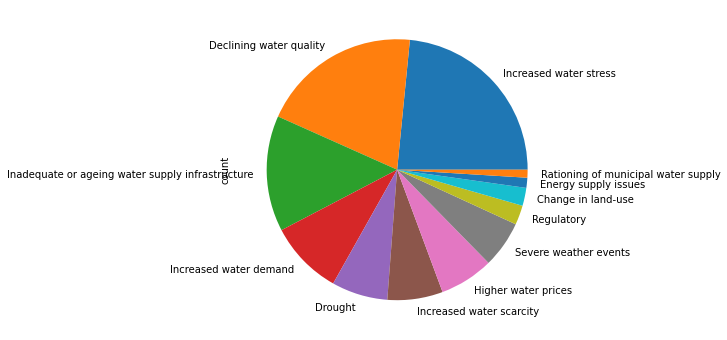

In [15]:
df3.drop('No Response').plot.pie(y='count',figsize=(6,6),legend=False)

In [16]:
df21=df1.iloc[1:18,:]
df20=df2.iloc[2:19,:]
df19=df3.drop('No Response')
df21=df21.rename(columns={'count': 'count21'})
df20=df20.rename(columns={'count': 'count20'})
df19=df19.rename(columns={'count': 'count19'})

In [17]:
risk21=df21.index.values
risk21count=df21.values
risk20=df20.index.values
risk20count=df20.values
risk19=df19.index.values
risk19count=df19.values

In [18]:
# Create the pandas DataFrame
df_21 = pd.DataFrame(risk21, columns = ['RISK'])

df_20 = pd.DataFrame(risk20, columns = ['RISK'])

df_19 = pd.DataFrame(risk19, columns = ['RISK'])
 
# print dataframe.
df_21['count21']=risk21count

df_20['count20']=risk20count

df_19['count19']=risk19count

In [19]:
outer_merged = pd.merge(df_21, df_20, how="outer", on=["RISK"])
outer_merged = pd.merge(outer_merged , df_19, how="outer", on=["RISK"])
outer_merged

,RISK,count21,count20,count19
0,Increased water stress,250.0,209.0,263.0
1,Declining water quality,237.0,163.0,223.0
2,Inadequate or ageing water supply infrastructure,197.0,140.0,161.0
3,Increased water demand,160.0,96.0,103.0
4,Drought,148.0,88.0,78.0
5,Increased water scarcity,147.0,73.0,77.0
6,Severe weather events,101.0,65.0,65.0
7,Higher water prices,89.0,63.0,75.0
8,Pollution incidents,46.0,20.0,NaN
9,Change in land-use,39.0,24.0,25.0


In [20]:
#Count the number of reported risk in each
riskregion=cities21_df[['CDP Region','Water security risk drivers']]
group =riskregion.groupby(['CDP Region'])
riskcount= group.count()
riskcount=riskcount.rename(columns={'Water security risk drivers':'Total Reported Risk'})
riskcount

,Total Reported Risk
CDP Region,
Africa,150
East Asia,247
Europe,416
Latin America,604
Middle East,19
North America,447
South and West Asia,42
Southeast Asia and Oceania,212


### 1. Increased water risk

In [21]:
#Subset of Increased water risk
risk1=riskregion[riskregion['Water security risk drivers'] == 'Increased water stress']
# Count Incresed water stress by region
group1 =risk1.groupby(['CDP Region'])
risk1count= group1.count()
risk1count=risk1count.rename(columns={'Water security risk drivers':'Increased water stress'})
#Proportion of 'Incresed water stress' in each region
risk1m=pd.merge(riskcount,risk1count,on='CDP Region')
risk1m['Proportion']=risk1m['Increased water stress']/risk1m['Total Reported Risk']
risk1m

,Total Reported Risk,Increased water stress,Proportion
CDP Region,,,
Africa,150,13,0.086667
East Asia,247,9,0.036437
Europe,416,48,0.115385
Latin America,604,82,0.135762
Middle East,19,4,0.210526
North America,447,68,0.152125
South and West Asia,42,5,0.119048
Southeast Asia and Oceania,212,21,0.099057


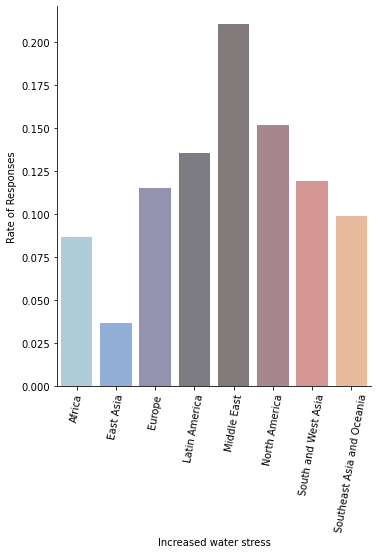

In [22]:
risk1m=risk1m.reset_index()
g = sns.catplot( 
    data=risk1m, kind="bar",x="CDP Region", y="Proportion",
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=80)
g.set_axis_labels( "Increased water stress", "Rate of Responses")

In [23]:
risk1m

,CDP Region,Total Reported Risk,Increased water stress,Proportion
0,Africa,150,13,0.086667
1,East Asia,247,9,0.036437
2,Europe,416,48,0.115385
3,Latin America,604,82,0.135762
4,Middle East,19,4,0.210526
5,North America,447,68,0.152125
6,South and West Asia,42,5,0.119048
7,Southeast Asia and Oceania,212,21,0.099057


### 2. Declining water quality

In [24]:
	#Subset of Declining water quality
risk2=riskregion[riskregion['Water security risk drivers'] == 'Declining water quality']
# Count Incresed water stress by region
group2 =risk2.groupby(['CDP Region'])
risk2count= group2.count()
risk2count=risk2count.rename(columns={'Water security risk drivers':'Declining water quality'})
#Proportion of 'Declining water quality' in each region
risk2m=pd.merge(riskcount,risk2count,on='CDP Region')
risk2m['Proportion']=risk2m['Declining water quality']/risk2m['Total Reported Risk']
risk2m

,Total Reported Risk,Declining water quality,Proportion
CDP Region,,,
Africa,150,20,0.133333
East Asia,247,7,0.028340
Europe,416,58,0.139423
Latin America,604,65,0.107616
Middle East,19,2,0.105263
North America,447,54,0.120805
South and West Asia,42,3,0.071429
Southeast Asia and Oceania,212,28,0.132075


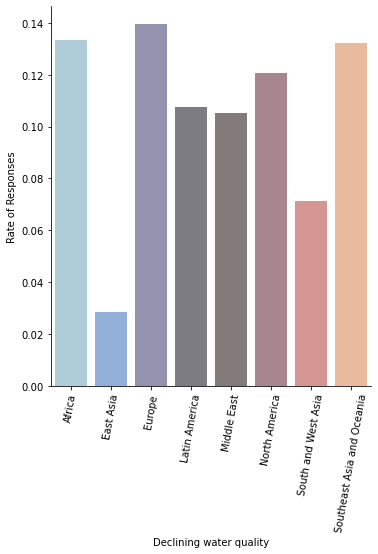

In [25]:
risk2m=risk2m.reset_index()
g = sns.catplot( 
    data=risk2m, kind="bar",x="CDP Region", y="Proportion",
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=80)
g.set_axis_labels( "Declining water quality", "Rate of Responses")

### 3. Inadequate or ageing infrastructure 


In [26]:
#Subset of Inadequate or ageing infrastructure
risk3=riskregion[riskregion['Water security risk drivers'] == 'Inadequate or ageing water supply infrastructure']
# Count Incresed water stress by region
group3 =risk3.groupby(['CDP Region'])
risk3count= group3.count()
risk3count=risk3count.rename(columns={'Water security risk drivers':'Inadequate or ageing infrastructure'})
#Proportion of 'Inadequate or ageing infrastructure' in each region
risk3m=pd.merge(riskcount,risk3count,on='CDP Region')
risk3m['Proportion']=risk3m['Inadequate or ageing infrastructure']/risk3m['Total Reported Risk']
risk3m

,Total Reported Risk,Inadequate or ageing infrastructure,Proportion
CDP Region,,,
Africa,150,25,0.166667
East Asia,247,7,0.028340
Europe,416,28,0.067308
Latin America,604,55,0.091060
Middle East,19,2,0.105263
North America,447,55,0.123043
South and West Asia,42,5,0.119048
Southeast Asia and Oceania,212,20,0.094340


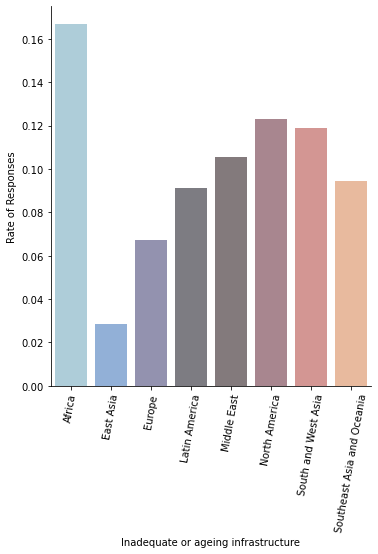

In [27]:
risk3m=risk3m.reset_index()
g = sns.catplot( 
    data=risk3m, kind="bar",x="CDP Region", y="Proportion",
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=80)
g.set_axis_labels( "Inadequate or ageing infrastructure", "Rate of Responses")

### 4. Increased water demand


In [28]:
#Subset of Increased water demand
risk4=riskregion[riskregion['Water security risk drivers'] == 'Increased water demand']
# Count Incresed water stress by region
group4 =risk4.groupby(['CDP Region'])
risk4count= group4.count()
risk4count=risk4count.rename(columns={'Water security risk drivers':'Increased water demand'})
#Proportion of 'Inadequate or ageing infrastructure' in each region
risk4m=pd.merge(riskcount,risk4count,on='CDP Region')
risk4m['Proportion']=risk4m['Increased water demand']/risk4m['Total Reported Risk']
risk4m

,Total Reported Risk,Increased water demand,Proportion
CDP Region,,,
Africa,150,14,0.093333
East Asia,247,5,0.020243
Europe,416,27,0.064904
Latin America,604,55,0.091060
Middle East,19,2,0.105263
North America,447,28,0.062640
South and West Asia,42,4,0.095238
Southeast Asia and Oceania,212,25,0.117925


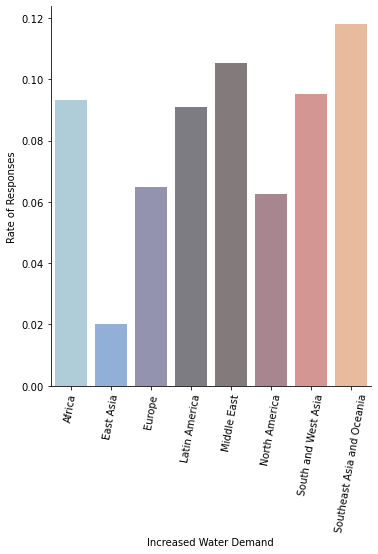

In [29]:
risk4m=risk4m.reset_index()
g = sns.catplot( 
    data=risk4m, kind="bar",x="CDP Region", y="Proportion",
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=80)
g.set_axis_labels( "Increased Water Demand", "Rate of Responses")

### 5. Drought


In [30]:
#Subset of Increased water demand
risk5=riskregion[riskregion['Water security risk drivers'] == 'Drought']
# Count Incresed water stress by region
group5 =risk5.groupby(['CDP Region'])
risk5count= group5.count()
risk5count=risk5count.rename(columns={'Water security risk drivers':'Drought'})
#Proportion of Drought in each region
risk5m=pd.merge(riskcount,risk5count,on='CDP Region')
risk5m['Proportion']=risk5m['Drought']/risk5m['Total Reported Risk']
risk5m

,Total Reported Risk,Drought,Proportion
CDP Region,,,
Africa,150,13,0.086667
East Asia,247,6,0.024291
Europe,416,34,0.081731
Latin America,604,46,0.076159
North America,447,33,0.073826
South and West Asia,42,1,0.023810
Southeast Asia and Oceania,212,15,0.070755


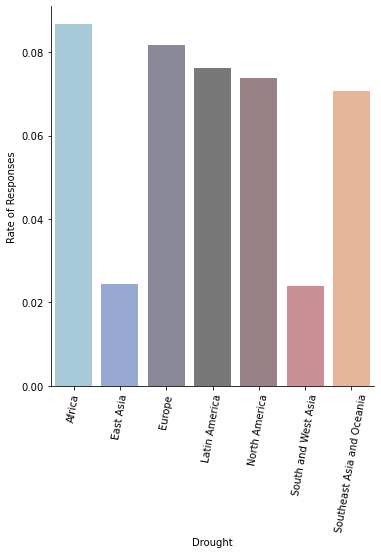

In [31]:
risk5m=risk5m.reset_index()
g = sns.catplot( 
    data=risk5m, kind="bar",x="CDP Region", y="Proportion",
    ci="sd", palette="icefire", alpha=.6, height=6)
g.set_xticklabels(rotation=80)
g.set_axis_labels( "Drought", "Rate of Responses")

In [32]:
idx=cities21_df['Water security risk drivers'].isin(outer_merged.loc[0:5,'RISK'].tolist())
risk5_2021=cities21_df[idx][['CDP Region','City','Water security risk drivers']].drop_duplicates()

In [33]:
risk5_2021.pivot_table(index=['CDP Region'],columns='Water security risk drivers',values='City',
                             aggfunc=lambda x: len(x),margins=True)

Water security risk drivers,Declining water quality,Drought,Inadequate or ageing water supply infrastructure,Increased water demand,Increased water scarcity,Increased water stress,All
CDP Region,,,,,,,
Africa,18.0,12.0,24.0,14.0,4.0,13.0,85
East Asia,7.0,5.0,7.0,4.0,12.0,9.0,44
Europe,54.0,34.0,27.0,27.0,25.0,46.0,213
Latin America,65.0,45.0,53.0,54.0,66.0,79.0,362
Middle East,2.0,NaN,2.0,2.0,1.0,4.0,11
North America,49.0,33.0,53.0,28.0,9.0,66.0,238
South and West Asia,3.0,1.0,4.0,4.0,4.0,5.0,21
Southeast Asia and Oceania,27.0,15.0,20.0,23.0,25.0,19.0,129
All,225.0,145.0,190.0,156.0,146.0,241.0,1103


## Overview

In [34]:
risk1m

,CDP Region,Total Reported Risk,Increased water stress,Proportion
0,Africa,150,13,0.086667
1,East Asia,247,9,0.036437
2,Europe,416,48,0.115385
3,Latin America,604,82,0.135762
4,Middle East,19,4,0.210526
5,North America,447,68,0.152125
6,South and West Asia,42,5,0.119048
7,Southeast Asia and Oceania,212,21,0.099057


In [35]:
outer_merged2 = pd.merge(risk1m, risk2m, how="outer", on=["CDP Region"])

In [36]:
outer_merged2 = pd.merge(outer_merged2, risk3m, how="outer", on=["CDP Region"])

In [37]:
outer_merged2 = pd.merge(outer_merged2, risk4m, how="outer", on=["CDP Region"])

/var/folders/16/4k9m0x9s1hx4zwvh8_yj6xrr0000gn/T/ipykernel_6377/2078178184.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Proportion_x', 'Total Reported Risk_x'} in the result is deprecated and will raise a MergeError in a future version.
  outer_merged2 = pd.merge(outer_merged2, risk4m, how="outer", on=["CDP Region"])


In [38]:
outer_merged2 = pd.merge(outer_merged2, risk5m, how="outer", on=["CDP Region"])

In [39]:
outer_merged2=outer_merged2[['CDP Region','Increased water stress','Declining water quality','Inadequate or ageing infrastructure','Increased water demand','Drought']]

In [40]:
outer_merged2

,CDP Region,Increased water stress,Declining water quality,Inadequate or ageing infrastructure,Increased water demand,Drought
0,Africa,13,20,25,14,13.0
1,East Asia,9,7,7,5,6.0
2,Europe,48,58,28,27,34.0
3,Latin America,82,65,55,55,46.0
4,Middle East,4,2,2,2,NaN
5,North America,68,54,55,28,33.0
6,South and West Asia,5,3,5,4,1.0
7,Southeast Asia and Oceania,21,28,20,25,15.0


<AxesSubplot:title={'center':'Stacked Bar Graph by Region'}, xlabel='CDP Region'>

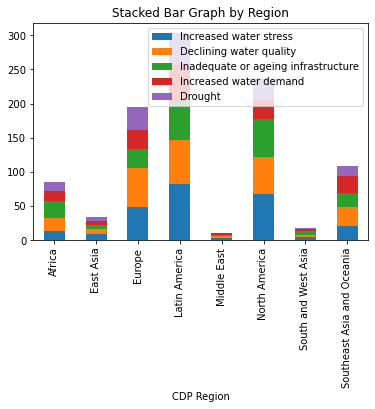

In [41]:
outer_merged2.plot(x='CDP Region', kind='bar', stacked=True,
        title='Stacked Bar Graph by Region')